In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']
#cutoff value is <500

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [4]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = ['C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280', 'C1230',
                              'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 
                              'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 
                              'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C1370', 'C1236', 'C2190', 'C4200'
                              'C5200', 'C1248', 'C2600', 'C1580', 'C6100', 'C1820', 'C1900', 'C2570', 'C1570', 'C3700', 'C2500', 
                              'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C4500', 'C1245', 'C2561', 'C2150', 
                              'C4200', 'C5200']

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [5]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df[['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']], dtype='int')
application_dummies.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [6]:
application_dummies['STATUS'] = application_df['STATUS']
application_dummies['ASK_AMT'] = application_df['ASK_AMT']
application_dummies.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5000
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,108590
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,5000
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,6692
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,142590


In [7]:
# Split our preprocessed data into our features and target arrays
X = application_dummies
y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization Attempt #1
Change activation functions

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="sigmoid", input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customise metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 18s 18ms/step - loss: 0.6588 - accuracy: 0.6392
Epoch 2/100
804/804 [==============================] - 15s 19ms/step - loss: 0.5824 - accuracy: 0.7233
Epoch 3/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5730 - accuracy: 0.7260
Epoch 4/100
804/804 [==============================] - 16s 19ms/step - loss: 0.5683 - accuracy: 0.7268
Epoch 5/100
804/804 [==============================] - 27s 34ms/step - loss: 0.5651 - accuracy: 0.7278
Epoch 6/100
804/804 [==============================] - 7s 8ms/step - loss: 0.5631 - accuracy: 0.7279
Epoch 7/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5614 - accuracy: 0.7288
Epoch 8/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5602 - accuracy: 0.7287
Epoch 9/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5594 - accuracy: 0.7288
Epoch 10/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5585

804/804 [==============================] - 10s 12ms/step - loss: 0.5492 - accuracy: 0.7332
Epoch 81/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5491 - accuracy: 0.7327
Epoch 82/100
804/804 [==============================] - 10s 12ms/step - loss: 0.5490 - accuracy: 0.7329
Epoch 83/100
804/804 [==============================] - 17s 21ms/step - loss: 0.5490 - accuracy: 0.7326
Epoch 84/100
804/804 [==============================] - 10s 13ms/step - loss: 0.5489 - accuracy: 0.7324
Epoch 85/100
804/804 [==============================] - 10s 13ms/step - loss: 0.5490 - accuracy: 0.7322
Epoch 86/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5491 - accuracy: 0.7333
Epoch 87/100
804/804 [==============================] - 17s 21ms/step - loss: 0.5489 - accuracy: 0.7329
Epoch 88/100
804/804 [==============================] - 10s 13ms/step - loss: 0.5487 - accuracy: 0.7330
Epoch 89/100
804/804 [==============================] - 13s 17ms/step - loss: 0

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.5492 - accuracy: 0.7318 - 2s/epoch - 8ms/step
Loss: 0.5491723418235779, Accuracy: 0.7317784428596497


Out of Relu, Tanh, Linear and Sigmoid, I was not able to find a combination that provided greater than 73% accuracy. Linear seemed promising in the first few epochs but did no better than Relu. Sigmoid has the best accuracy by a small margin, so we will work with that going forward. 
Tanh - 72.0%
Linear - 72.0%
Sigmoid - 72.5%
Relu - 72.2%

<Axes: xlabel='Activation_Function'>

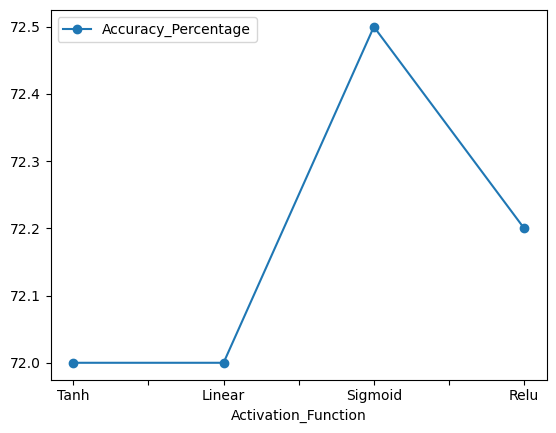

In [27]:
activation_functions = pd.DataFrame({'Activation_Function': ['Tanh', 'Linear', 'Sigmoid','Relu'], 'Accuracy_Percentage': [72.0, 72.0, 72.5, 72.2]})
activation_functions.plot.line(x='Activation_Function', y='Accuracy_Percentage', style='-o')

## Optimization Attempt #2
Add more neurons to the layers

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=43, activation="sigmoid", input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 43)                1892      
                                                                 
 dense_4 (Dense)             (None, 20)                880       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2793 (10.91 KB)
Trainable params: 2793 (10.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the Sequential model together and customise metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 16s 16ms/step - loss: 0.5998 - accuracy: 0.7029
Epoch 2/100
804/804 [==============================] - 10s 12ms/step - loss: 0.5752 - accuracy: 0.7208
Epoch 3/100
804/804 [==============================] - 11s 14ms/step - loss: 0.5707 - accuracy: 0.7238
Epoch 4/100
804/804 [==============================] - 16s 20ms/step - loss: 0.5669 - accuracy: 0.7258
Epoch 5/100
804/804 [==============================] - 20s 24ms/step - loss: 0.5633 - accuracy: 0.7271
Epoch 6/100
804/804 [==============================] - 15s 18ms/step - loss: 0.5605 - accuracy: 0.7276
Epoch 7/100
804/804 [==============================] - 20s 25ms/step - loss: 0.5586 - accuracy: 0.7292
Epoch 8/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5569 - accuracy: 0.7291
Epoch 9/100
804/804 [==============================] - 17s 21ms/step - loss: 0.5557 - accuracy: 0.7292
Epoch 10/100
804/804 [==============================] - 15s 18ms/step - lo

804/804 [==============================] - 6s 8ms/step - loss: 0.5402 - accuracy: 0.7367
Epoch 81/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5405 - accuracy: 0.7364
Epoch 82/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5401 - accuracy: 0.7375
Epoch 83/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5402 - accuracy: 0.7370
Epoch 84/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5399 - accuracy: 0.7365
Epoch 85/100
804/804 [==============================] - 10s 12ms/step - loss: 0.5400 - accuracy: 0.7365
Epoch 86/100
804/804 [==============================] - 8s 11ms/step - loss: 0.5398 - accuracy: 0.7373
Epoch 87/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5397 - accuracy: 0.7369
Epoch 88/100
804/804 [==============================] - 10s 12ms/step - loss: 0.5396 - accuracy: 0.7364
Epoch 89/100
804/804 [==============================] - 12s 15ms/step - loss: 0.5394 - a

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5469 - accuracy: 0.7350 - 708ms/epoch - 3ms/step
Loss: 0.5469287633895874, Accuracy: 0.7350437045097351


Adding more neurons to the layers has not increased accuracy.

## Optimization Attempt #3
Add more layers

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="sigmoid", input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 352       
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the Sequential model together and customise metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 14s 11ms/step - loss: 0.6788 - accuracy: 0.5751
Epoch 2/100
804/804 [==============================] - 7s 9ms/step - loss: 0.5859 - accuracy: 0.7246
Epoch 3/100
804/804 [==============================] - 10s 13ms/step - loss: 0.5778 - accuracy: 0.7277
Epoch 4/100
804/804 [==============================] - 11s 13ms/step - loss: 0.5763 - accuracy: 0.7299
Epoch 5/100
804/804 [==============================] - 12s 15ms/step - loss: 0.5745 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 16s 20ms/step - loss: 0.5723 - accuracy: 0.7290
Epoch 7/100
804/804 [==============================] - 11s 14ms/step - loss: 0.5698 - accuracy: 0.7293
Epoch 8/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5671 - accuracy: 0.7286
Epoch 9/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5651 - accuracy: 0.7297
Epoch 10/100
804/804 [==============================] - 9s 11ms/step - loss: 

804/804 [==============================] - 8s 10ms/step - loss: 0.5483 - accuracy: 0.7328
Epoch 81/100
804/804 [==============================] - 8s 10ms/step - loss: 0.5480 - accuracy: 0.7334
Epoch 82/100
804/804 [==============================] - 8s 11ms/step - loss: 0.5479 - accuracy: 0.7335
Epoch 83/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5481 - accuracy: 0.7328
Epoch 84/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5480 - accuracy: 0.7322
Epoch 85/100
804/804 [==============================] - 12s 15ms/step - loss: 0.5482 - accuracy: 0.7334
Epoch 86/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5479 - accuracy: 0.7325
Epoch 87/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5478 - accuracy: 0.7330
Epoch 88/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5479 - accuracy: 0.7337
Epoch 89/100
804/804 [==============================] - 9s 11ms/step - loss: 0.5481 -

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.5480 - accuracy: 0.7336 - 2s/epoch - 7ms/step
Loss: 0.5479811429977417, Accuracy: 0.7336443066596985


Adding extra layers has not improved our accuracy level at all.

<Axes: xlabel='Optimization'>

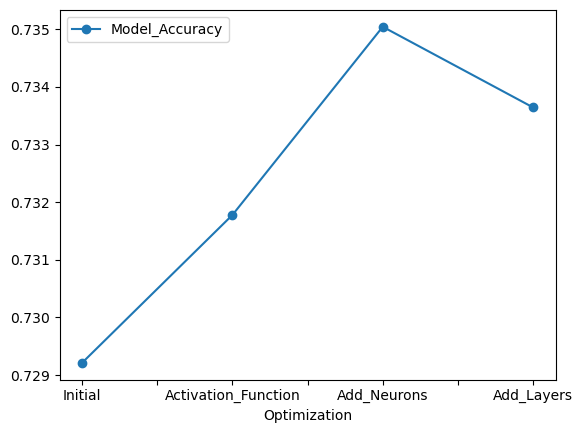

In [29]:
overall_improvement = pd.DataFrame({'Optimization': ['Initial', 'Activation_Function', 'Add_Neurons', 'Add_Layers'], 'Model_Accuracy': [0.7292128205299377, 0.7317784428596497, 0.7350437045097351, 0.7336443066596985]})
overall_improvement.plot.line(x='Optimization', y='Model_Accuracy', style='-o')

Overall, we were able to imrpove the models accuracy by only 0.06%. This optimization has been unsuccessful. 

In [22]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity_Optimisation.h5')

C:\Users\evang\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
